In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5')
pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

dmag regressor trained, R2=0.98229046963
qR regressor trained, R2=0.978991221574


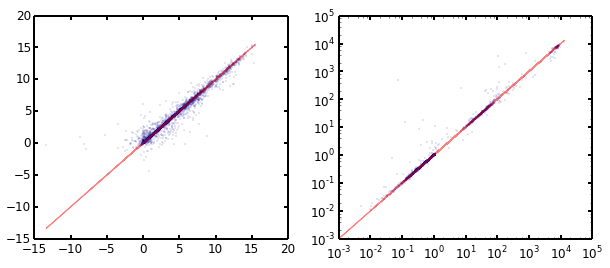

In [2]:
%matplotlib inline
pop._train_pipelines(n_jobs=8, plot=True)

In [8]:
pop.radius_B

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [10]:
pop.mass_B

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [12]:
pop._define_stars()

In [13]:
len(pop.stars)

34689

In [15]:
pop._i_bg

Int64Index([ 44839, 114790, 140741, 171037,  57396,  48512,   4926,  34640,
             26007, 108178,
            ...
             98445, 130812,  76139, 145288, 152409,   7126, 126318, 159979,
            162428,  51410],
           dtype='int64', length=34689)

In [16]:
pop.stars.head()


,Gc,age,feh,mass_A,logL,logTe,logg,m-M0,Av,m2/m1,...,d_pri,d_sec,T14_pri,T14_sec,T23_pri,T23_sec,dataspan,dutycycle,target_mag,b_target
44839,1,9.71,-0.13,0.11807,-2.846,3.478,5.213,13.1,0.306,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1459.789,0.6986,14.940,11.166572
114790,2,10.05,-1.27,0.29567,-1.697,3.620,5.034,13.3,0.379,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1459.789,0.8753,13.524,6.193859
140741,2,10.07,-1.25,0.11682,-2.712,3.528,5.274,13.2,0.395,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1459.789,0.6987,14.678,10.410357
171037,3,10.11,-1.69,0.09459,-3.061,3.494,5.395,13.2,0.331,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1459.789,0.6988,14.844,10.411438
57396,1,9.77,-0.03,0.47423,-1.426,3.594,4.860,12.7,0.315,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1459.789,0.6989,14.836,10.396925


In [ ]:
pop.